In [1]:
import cv2
import pandas as pd
import patchesMethods as pm
import numpy as np

In [4]:
patchesDB = pm.loadDataBase(600,2000)    
img = pm.searchNearestKey(patchesDB, 75)
print(len(patchesDB))


383


In [4]:
print(len(patchesDB))

635


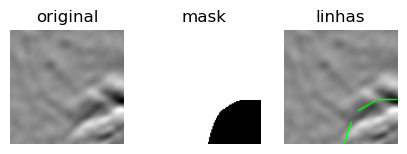

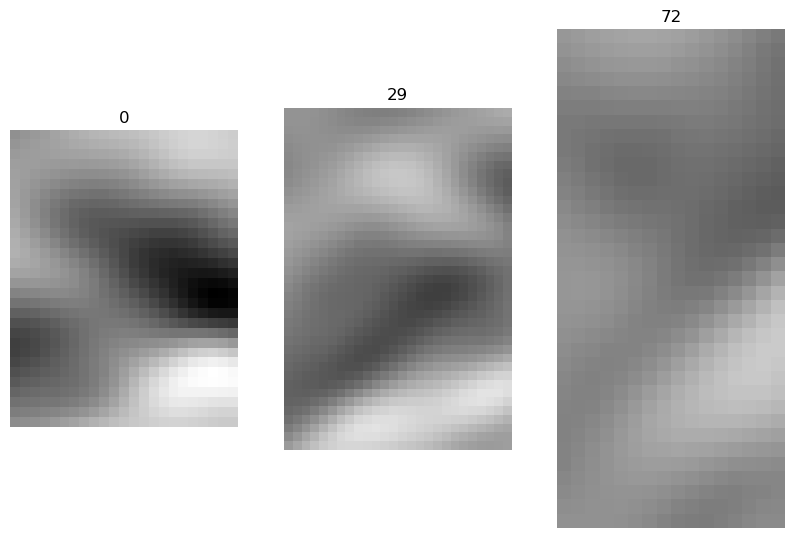

In [7]:
sample_path="../tgs_salt/0c19639aeb.png"
mask_path  ="../tgs_salt/0c19639aebMask.png"

original = cv2.imread(sample_path)
mask = cv2.imread(mask_path,0)
patches, linesImage = pm.probHough(mask, original, tresh = 10, minPoints=15, maxGap=10, sort=False)

pm.showImages([original, mask, linesImage],['original','mask','linhas'] )
pm.dispPatchesClass(patches)

In [3]:
print(len(patches))


NameError: name 'patches' is not defined

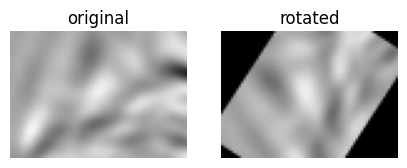

In [11]:
# Carrega a imagem
original = patches[0].image 
rotated = pm.rotateImage(original, 57)
pm.showImages( [original, rotated],['original','rotated']) 

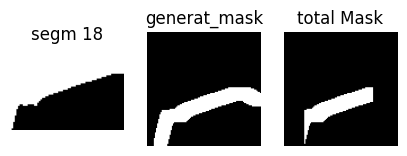

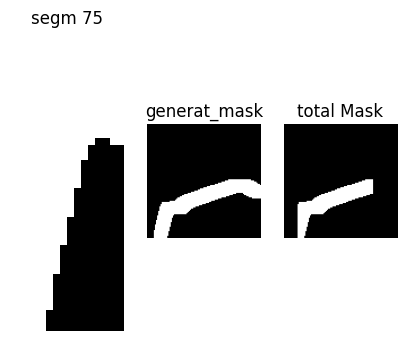

In [6]:
dilated_edge, zone0, zone1, fullmask = pm.create_Masks(mask)
generat_mask = dilated_edge

if patches is not None:
    p = patches[0]
    origRGBSample = pm.searchNearestKey(patchesDB, p.angle)
    x1,y1,x2,y2 = p.line
    #set 0 to generat_mask columns from y1 to y2
    patchMask = pm.makePatchMask(generat_mask, x1, x2)
    
genSegments = patches
samplesPatchesDB = patchesDB

#iterate over patches and angle segments
if genSegments is not None: # if patches not null makePatchMask
    totalMask = np.zeros(generat_mask.shape)
    for p in genSegments:
        # but first step is to generate the edge zone
        generat_mask = dilated_edge
        #p = genSegments[0]  #one first example of patch
        
        origRGBSample = pm.searchNearestKey(samplesPatchesDB, p.angle)
        x1,y1,x2,y2 = p.line
        patchMask = pm.makePatchMask(generat_mask, x1, x2)
        totalMask = totalMask + patchMask
        imagesList = [p.image, generat_mask, totalMask]
        titlesList = ['segm ' + str(p.angle), 'generat_mask', 'total Mask']
        pm.showImages( imagesList, titlesList) 
        key = cv2.waitKey(0)

In [7]:
# ampliar a mascara patchMask com o proximo segmento
# para isso preciso de uma funcao que me devolva o segmento mais proximo de um dado segmento
# e que me devolva a distancia entre os segmentos
# e que me devolva o segmento mais proximo de um dado segmento

genSegments = patches
if genSegments is not None: # if patches not null makePatchMask
    for p in genSegments:
        p = genSegments[0]  #one first example of patch
        origRGBSample = pm.searchNearestKey(samplesPatchesDB, p.angle)
        x1,y1,x2,y2 = p.line
        patchMask = pm.makePatchMask(generat_mask, x1, x2)